# 3. Semantic Segmentation

In [1]:
import tensorflow as tf

### Downloading the DeepLab-v3+
<a href="">Here</a> you can see the DeepLab-v3+ repository.

In [2]:
!git clone https://github.com/rkuo2000/keras-deeplab-v3-plus 
%cd keras-deeplab-v3-plus

Cloning into 'keras-deeplab-v3-plus'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 375 (delta 5), reused 0 (delta 0), pack-reused 363
Receiving objects: 100% (375/375), 5.12 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (199/199), done.
/content/keras-deeplab-v3-plus


In [3]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from model import Deeplabv3

## Pre-processing the input
Pre-processing steps:
  <ul>
    <li>Resizing the image to 512x512.</li>
    <li>Add Padding to the image to match training images</li>
    <li>Apply Normalization (Divide by 255).</li>
  </ul>

(512, 382)


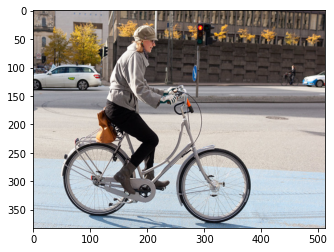

In [20]:
# Opening the image
testfile = '/content/test.jpg'
image = Image.open(testfile)
# Resize to 512
trained_image_width=512 
ratio = float(trained_image_width) / np.max([w, h])
resized_image = image.resize((int(ratio * w), int(ratio * h)))
print(resized_image.size)

plt.imshow(resized_image)
plt.show()

0 130
(512, 512, 3)


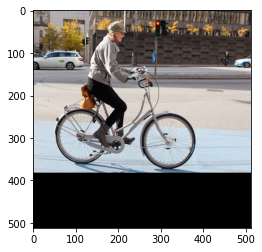

In [21]:
# padding array to square image to match training images
pad_x = int(trained_image_width - resized_image.size[0])
pad_y = int(trained_image_width - resized_image.size[1])
print(pad_x, pad_y)

# numpy padding
input_image = np.pad(np.array(resized_image), ((0, pad_y), (0, pad_x), (0, 0)), mode='constant')
print(input_image.shape)

plt.imshow(input_image)
plt.show()

In [22]:
# apply normalization
input_image = input_image / 255.0

# expand first dimension
input_image = np.expand_dims(input_image, 0)
print(input_image.shape)

(1, 512, 512, 3)


## Defining the model

In [23]:
model = Deeplabv3()

In [26]:
res = model.predict(input_image)

In [27]:
# reshape to two dimension 512x512)
labels = np.argmax(res.squeeze(), -1)

# remove padding
if pad_y > 0:
    labels = labels[:-pad_y]
if pad_x > 0:
    labels = labels[:, :-pad_x]

640 478


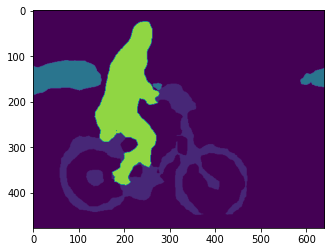

In [28]:
# resize back to original size
print(w,h)
pil_labels = Image.fromarray(labels.astype('uint8'))
resized_labels = pil_labels.resize((w,h))
out_labels = resized_labels

plt.imshow(out_labels)
plt.show()

## Save Segmentation

In [29]:
plt.imsave('out_labels.png', out_labels)

In [35]:
def show2img(testfile, outfile):
    testimg = plt.imread(testfile)
    outimg  = plt.imread(outfile)

    NUM_ROWS = 1
    IMGs_IN_ROW = 2
    fig, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))
    ax[0].imshow(testimg, interpolation='nearest')
    ax[0].axis('off')
    ax[1].imshow(outimg,  interpolation='nearest')
    ax[1].axis('off')

    ax[0].set_title('Original Picture')
    ax[1].set_title('Segmented Output')

    title = 'side by side view of images'
    fig.suptitle(title, fontsize=16)
    plt.show()

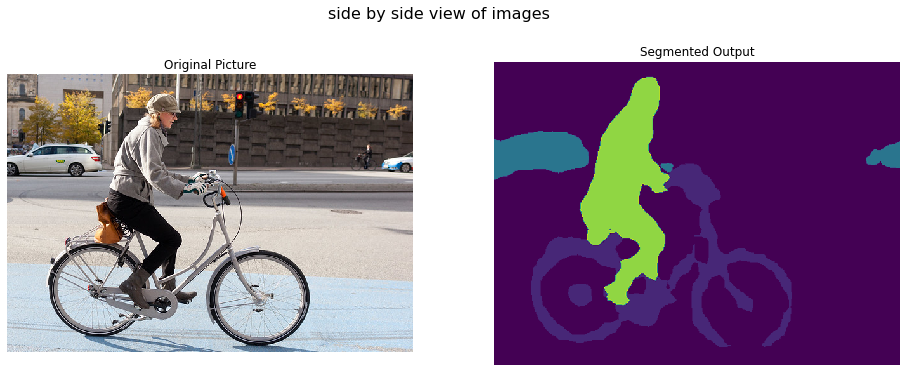

In [36]:
show2img(testfile, 'out_labels.png')